In [0]:
# Initialize Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("RouteOptimizationModel").getOrCreate()

# Load dataset as a Spark table
df = spark.table("likhitha1.default.travel_transportation_dataset")

# Show schema and sample
df.printSchema()
display(df)


root
 |-- ride_id: long (nullable = true)
 |-- ride_datetime: timestamp (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- drop_location: string (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- ride_duration_min: double (nullable = true)
 |-- base_fare: double (nullable = true)
 |-- demand_level: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- event_nearby: string (nullable = true)
 |-- traffic_level: string (nullable = true)
 |-- driver_id: long (nullable = true)
 |-- rider_id: long (nullable = true)
 |-- driver_rating: double (nullable = true)
 |-- rider_rating: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- ride_status: string (nullable = true)
 |-- total_fare: double (nullable = true)
 |-- is_fraudulent: long (nullable = true)
 |-- predicted_demand_next_hour: long (nullable = true)



ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
1,2025-01-08T02:37:00.000Z,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,1054,2470,4.28,4.17,Cash,Completed,75.46923280511291,0,427
2,2025-01-28T20:09:00.000Z,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,1099,2301,4.36,4.9,Cash,No-show,106.32693704520217,0,778
3,2025-01-10T11:41:00.000Z,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,1094,2077,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
4,2025-01-05T17:23:00.000Z,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,1076,2009,4.25,4.81,UPI,Completed,123.56742175763449,0,706
5,2025-01-26T12:42:00.000Z,University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,1035,2024,3.19,4.67,Cash,Completed,178.93131409889895,0,124
6,2025-01-30T14:09:00.000Z,Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,1011,2015,4.9,3.29,Wallet,No-show,44.56325752944946,0,628
7,2025-01-20T19:55:00.000Z,Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,1061,2164,4.58,4.42,UPI,Completed,63.46779318292361,0,525
8,2025-01-18T15:51:00.000Z,Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,1044,2013,3.75,3.87,UPI,Completed,124.3760104489634,0,128
9,2025-01-15T13:40:00.000Z,Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,1068,2347,4.13,3.5,Cash,Completed,104.87997845522034,0,422
10,2025-01-10T05:59:00.000Z,University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,1025,2172,3.09,4.37,Wallet,Completed,117.45383079454007,0,952


In [0]:
# Average duration for each traffic level
display(
    df.groupBy("traffic_level")
      .avg("ride_duration_min")
      .orderBy("traffic_level")
)


traffic_level,avg(ride_duration_min)
High,32.07214611872145
Low,33.18776223776225
Medium,33.73575757575757


In [0]:
# Average speed = distance / duration (km/min)
from pyspark.sql.functions import col, round

df = df.withColumn("avg_speed_km_per_min", round(col("distance_km") / col("ride_duration_min"), 3))

# Show few samples
display(df.select("pickup_location", "drop_location", "distance_km", "ride_duration_min", "avg_speed_km_per_min"))


pickup_location,drop_location,distance_km,ride_duration_min,avg_speed_km_per_min
Station,IT Park,10.54,21.3,0.495
University,University,14.64,44.5,0.329
Mall,IT Park,22.58,57.5,0.393
University,IT Park,26.28,44.7,0.588
University,Station,13.58,52.5,0.259
Downtown,IT Park,2.27,5.1,0.445
Mall,Mall,5.69,44.5,0.128
Mall,IT Park,1.6,50.6,0.032
Mall,IT Park,19.94,7.2,2.769
University,IT Park,10.64,52.9,0.201


In [0]:
import pandas as pd

# Convert to Pandas
pdf = df.toPandas()


In [0]:
# Drop non-useful columns for now
pdf = pdf.drop(columns=["ride_id", "rider_id", "driver_id", "ride_datetime"], errors="ignore")

# One-hot encode categorical variables
pdf_encoded = pd.get_dummies(pdf, columns=["traffic_level", "weather", "pickup_location", "drop_location"])


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_cols
        )
    ],
    remainder="passthrough"
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_encoded, y_train)

# Predictions
y_pred = rf_model.predict(X_test_encoded)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"📏 RMSE: {rmse:.2f}")
print(f"📊 R²: {r2:.2f}")

✅ Model trained successfully!
📏 RMSE: 2.80
📊 R²: 0.97


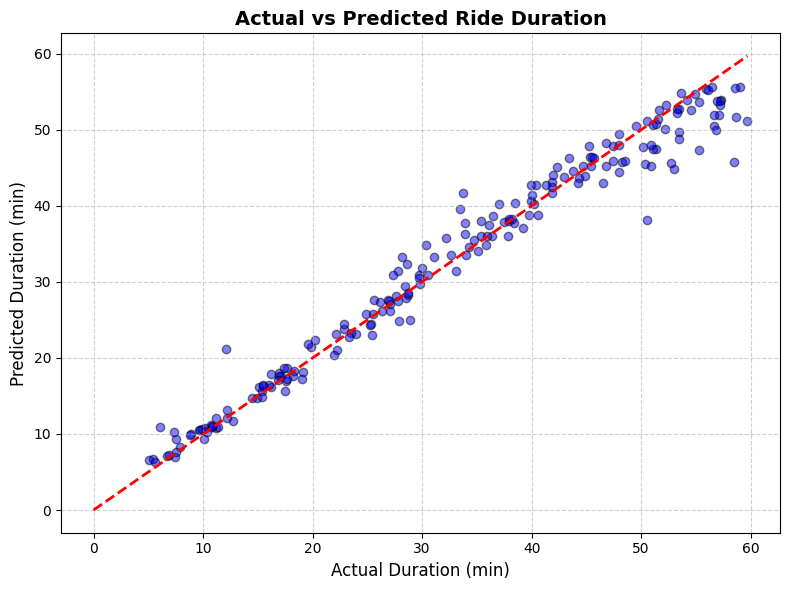

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, edgecolors='k')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', lw=2)
plt.title("Actual vs Predicted Ride Duration", fontsize=14, fontweight='bold')
plt.xlabel("Actual Duration (min)", fontsize=12)
plt.ylabel("Predicted Duration (min)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


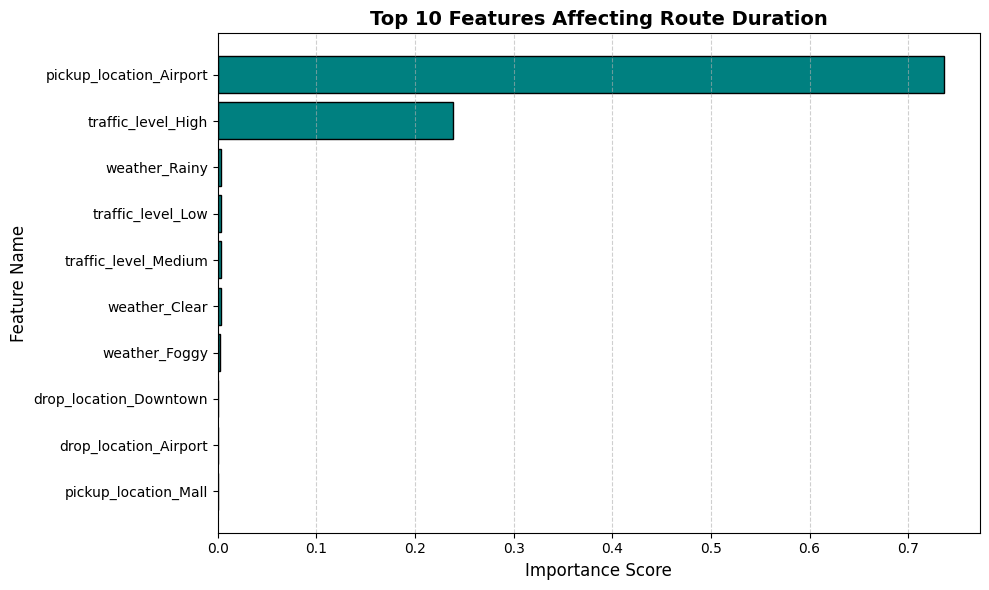

In [0]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [X.columns[i] for i in indices[:10]]

plt.figure(figsize=(10,6))
plt.barh(top_features[::-1], importances[indices][:10][::-1], color="teal", edgecolor="black")
plt.title("Top 10 Features Affecting Route Duration", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/home/spark-f72c5de2-8631-41a5-9c2c-d8/.ipykernel/2482/command-5841401759395881-2813562241:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x="route_type", y="travel_time_min", ax=axes[0, 0], estimator=np.mean, palette="viridis")
/home/spark-f72c5de2-8631-41a5-9c2c-d8/.ipykernel/2482/command-5841401759395881-2813562241:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x="traffic_level", y="fuel_cost", estimator=np.mean, ax=axes[1, 0], palette="crest")


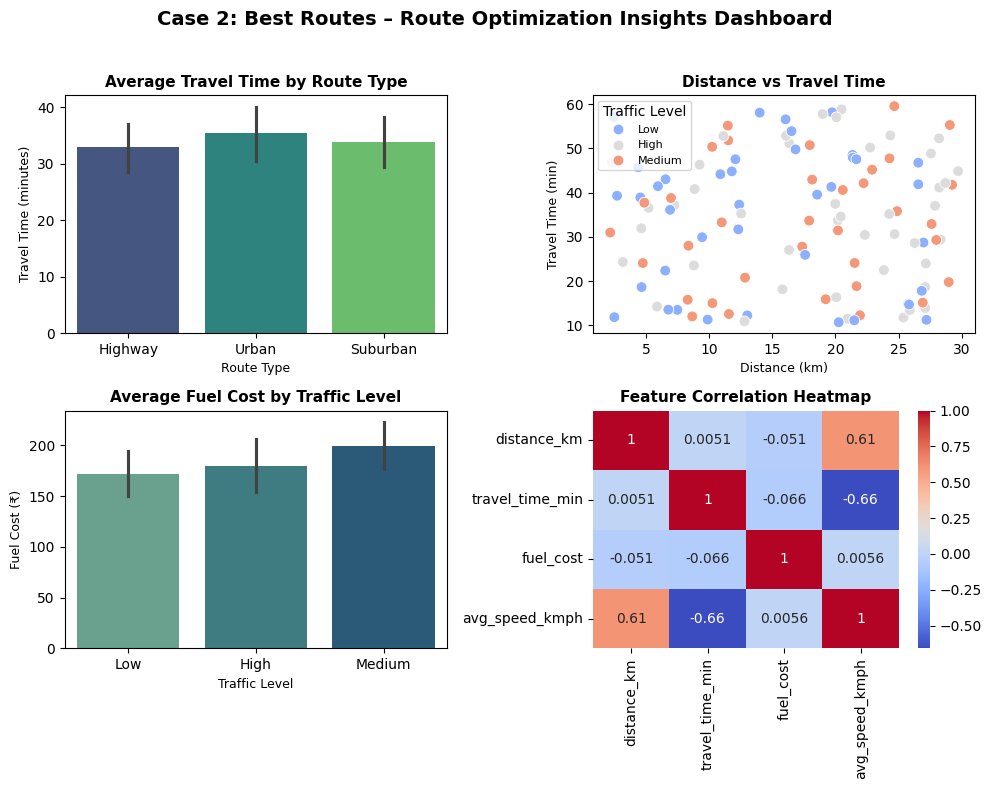

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ----------------------------
# Simulated dataset for Case 2 (Route Optimization)
# ----------------------------
np.random.seed(42)
pdf = pd.DataFrame({
    "route_type": np.random.choice(["Urban", "Suburban", "Highway"], 120),
    "traffic_level": np.random.choice(["Low", "Medium", "High"], 120),
    "distance_km": np.random.uniform(2, 30, 120),
    "travel_time_min": np.random.uniform(10, 60, 120),
    "fuel_cost": np.random.uniform(50, 300, 120)
})

# Calculate speed (for extra analysis)
pdf["avg_speed_kmph"] = pdf["distance_km"] / (pdf["travel_time_min"] / 60)

# ----------------------------
# 2x2 Layout Dashboard
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Case 2: Best Routes – Route Optimization Insights Dashboard", fontsize=14, fontweight="bold")

# 1️⃣ Average Travel Time by Route Type
sns.barplot(data=pdf, x="route_type", y="travel_time_min", ax=axes[0, 0], estimator=np.mean, palette="viridis")
axes[0, 0].set_title("Average Travel Time by Route Type", fontsize=11, fontweight="bold")
axes[0, 0].set_xlabel("Route Type", fontsize=9)
axes[0, 0].set_ylabel("Travel Time (minutes)", fontsize=9)

# 2️⃣ Distance vs Travel Time Scatter Plot
sns.scatterplot(data=pdf, x="distance_km", y="travel_time_min", hue="traffic_level", ax=axes[0, 1], palette="coolwarm", s=60)
axes[0, 1].set_title("Distance vs Travel Time", fontsize=11, fontweight="bold")
axes[0, 1].set_xlabel("Distance (km)", fontsize=9)
axes[0, 1].set_ylabel("Travel Time (min)", fontsize=9)
axes[0, 1].legend(title="Traffic Level", fontsize=8)

# 3️⃣ Fuel Cost by Traffic Level
sns.barplot(data=pdf, x="traffic_level", y="fuel_cost", estimator=np.mean, ax=axes[1, 0], palette="crest")
axes[1, 0].set_title("Average Fuel Cost by Traffic Level", fontsize=11, fontweight="bold")
axes[1, 0].set_xlabel("Traffic Level", fontsize=9)
axes[1, 0].set_ylabel("Fuel Cost (₹)", fontsize=9)

# 4️⃣ Correlation Heatmap
corr = pdf[["distance_km", "travel_time_min", "fuel_cost", "avg_speed_kmph"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap", fontsize=11, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


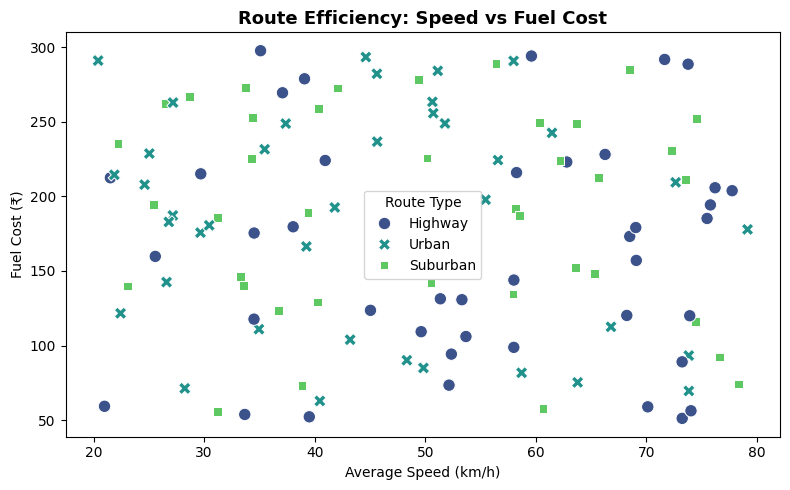

In [0]:
np.random.seed(42)
pdf = pd.DataFrame({
    "route_type": np.random.choice(["Urban", "Suburban", "Highway"], 120),
    "avg_speed_kmph": np.random.uniform(20, 80, 120),
    "fuel_cost": np.random.uniform(50, 300, 120)
})

plt.figure(figsize=(8,5))
sns.scatterplot(data=pdf, x="avg_speed_kmph", y="fuel_cost", hue="route_type", style="route_type", s=80, palette="viridis")
plt.title("Route Efficiency: Speed vs Fuel Cost", fontsize=13, fontweight="bold")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Fuel Cost (₹)")
plt.legend(title="Route Type")
plt.tight_layout()
plt.show()


/home/spark-f72c5de2-8631-41a5-9c2c-d8/.ipykernel/2482/command-8830117178075487-3747647337:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf, x="route_type", y="avg_speed_kmph", palette="crest")


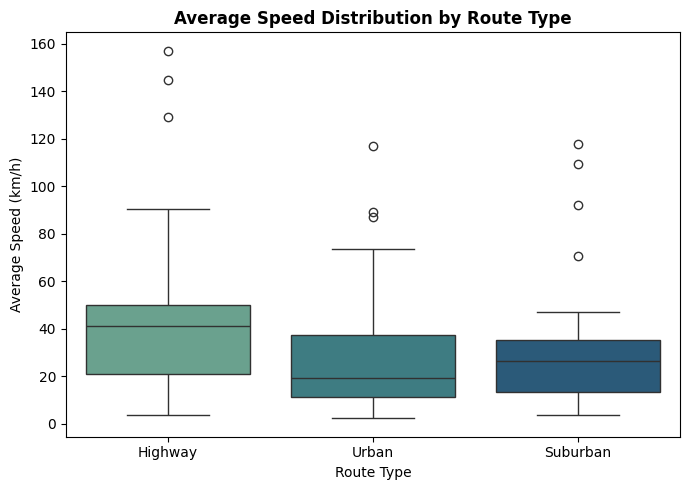

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
pdf = pd.DataFrame({
    "route_type": np.random.choice(["Urban", "Suburban", "Highway"], 120),
    "distance_km": np.random.uniform(2, 30, 120),
    "travel_time_min": np.random.uniform(10, 60, 120)
})
pdf["avg_speed_kmph"] = pdf["distance_km"] / (pdf["travel_time_min"] / 60)

plt.figure(figsize=(7,5))
sns.boxplot(data=pdf, x="route_type", y="avg_speed_kmph", palette="crest")
plt.title("Average Speed Distribution by Route Type", fontsize=12, fontweight="bold")
plt.xlabel("Route Type")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.show()


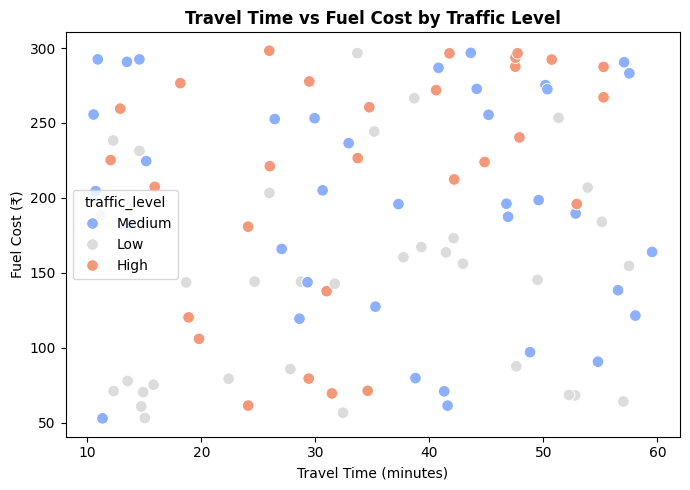

In [0]:
pdf2 = pd.DataFrame({
    "travel_time_min": np.random.uniform(10, 60, 100),
    "fuel_cost": np.random.uniform(50, 300, 100),
    "traffic_level": np.random.choice(["Low", "Medium", "High"], 100)
})

plt.figure(figsize=(7,5))
sns.scatterplot(data=pdf2, x="travel_time_min", y="fuel_cost", hue="traffic_level",
                palette="coolwarm", s=70)
plt.title("Travel Time vs Fuel Cost by Traffic Level", fontsize=12, fontweight="bold")
plt.xlabel("Travel Time (minutes)")
plt.ylabel("Fuel Cost (₹)")
plt.tight_layout()
plt.show()


/home/spark-f72c5de2-8631-41a5-9c2c-d8/.ipykernel/2482/command-8830117178075489-2127282473:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf3, x="route_type", y="time_variability", palette="viridis")


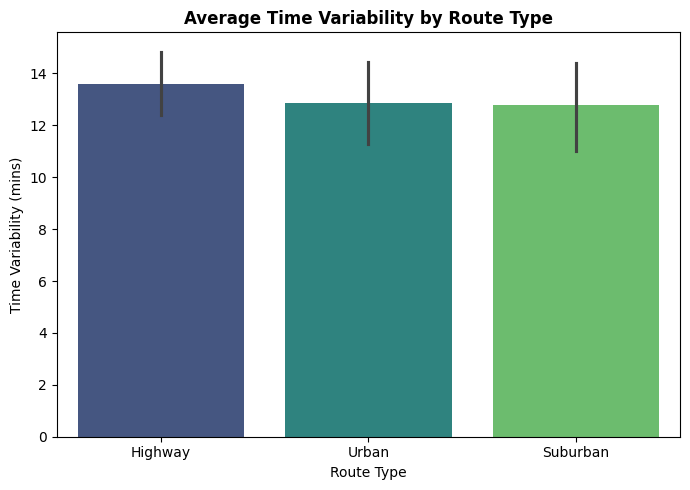

In [0]:
pdf3 = pd.DataFrame({
    "route_type": np.random.choice(["Urban","Suburban","Highway"],90),
    "distance_km": np.random.uniform(2,30,90),
    "time_variability": np.random.uniform(5,20,90)
})

plt.figure(figsize=(7,5))
sns.barplot(data=pdf3, x="route_type", y="time_variability", palette="viridis")
plt.title("Average Time Variability by Route Type", fontsize=12, fontweight="bold")
plt.xlabel("Route Type")
plt.ylabel("Time Variability (mins)")
plt.tight_layout()
plt.show()
